In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
x

In [151]:
data = pd.read_csv("./wine-clustering.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Atributos:**

Alcohol - Álcool

Malic_Acid - Ácido málico

Ash - Cinzas

Ash_Alcanity - Alcalinidade das cinzas

Magnesium - Magnésio

Total_Phenols - Fenóis totais

Flavanoids - Flavonóides

Nonflavanoid_Phenols - Fenóis não flavonóides

Proanthocyanins - Proantocianinas

Color_Intensity - Intensidade da cor

Hue - Matiz

OD280 - OD280/OD315 de vinhos diluídos

Proline - Prolina

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [10]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
data.shape

(178, 13)

In [152]:
data2 = pd.DataFrame.copy(data)

### Escalonamento

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
escala = StandardScaler()
data2_esc = escala.fit_transform(data2)

## K-Means (todos atributos)

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 7, max_iter = 300)
    kmeans.fit(data2_esc)
    wcss.append(kmeans.inertia_)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

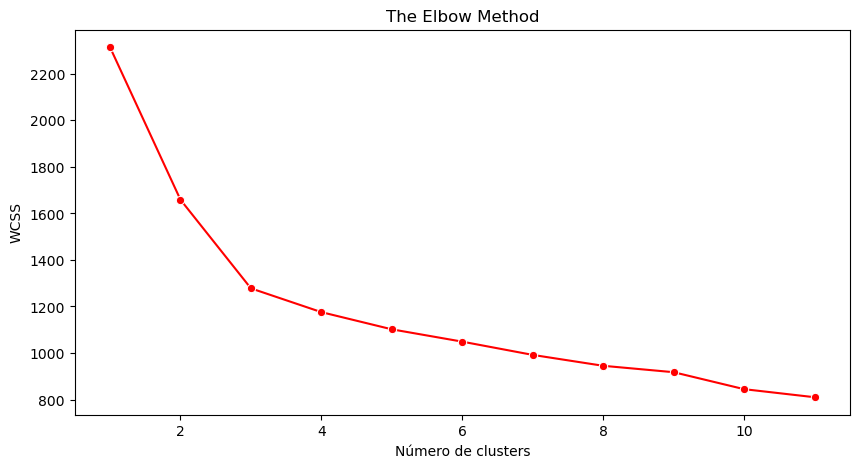

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 12), y=wcss ,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Ponto de inflexão mais evidente ocorre em k = 3, indicando que 3 clusters é uma escolha adequada.

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 7, max_iter = 300)

In [29]:
kmeans_fit = kmeans.fit(data2_esc)

In [47]:
centroides = kmeans_fit.cluster_centers_

In [48]:
centroides

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [33]:
escala.inverse_transform(kmeans_fit.cluster_centers_)

array([[1.36767742e+01, 1.99790323e+00, 2.46629032e+00, 1.74629032e+01,
        1.07967742e+02, 2.84758065e+00, 3.00322581e+00, 2.92096774e-01,
        1.92209677e+00, 5.45354839e+00, 1.06548387e+00, 3.16338710e+00,
        1.10022581e+03],
       [1.31341176e+01, 3.30725490e+00, 2.41764706e+00, 2.12411765e+01,
        9.86666667e+01, 1.68392157e+00, 8.18823529e-01, 4.51960784e-01,
        1.14588235e+00, 7.23470586e+00, 6.91960784e-01, 1.69666667e+00,
        6.19058824e+02],
       [1.22509231e+01, 1.89738462e+00, 2.23123077e+00, 2.00630769e+01,
        9.27384615e+01, 2.24769231e+00, 2.05000000e+00, 3.57692308e-01,
        1.62415385e+00, 2.97307692e+00, 1.06270769e+00, 2.80338462e+00,
        5.10169231e+02]])

In [49]:
classificacao = kmeans_fit.labels_

In [50]:
agrupamento = pd.DataFrame(classificacao, columns = ['Group'])
agrupamento

,Group
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [51]:
data3 = pd.concat([data2, agrupamento],axis=1)
data3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [52]:
data3.Group.value_counts()

Group
2    65
0    62
1    51
Name: count, dtype: int64

**Análise dos dados através do grupo**

In [62]:
data3.iloc[77 , :]

Alcohol                  11.84
Malic_Acid                2.89
Ash                       2.23
Ash_Alcanity             18.00
Magnesium               112.00
Total_Phenols             1.72
Flavanoids                1.32
Nonflavanoid_Phenols      0.43
Proanthocyanins           0.95
Color_Intensity           2.65
Hue                       0.96
OD280                     2.52
Proline                 500.00
Group                     2.00
Name: 77, dtype: float64

In [60]:
grupo0 = data3.loc[data3.Group == 0]
grupo0.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [59]:
grupo1 = data3.loc[data3.Group == 1]
grupo1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,1
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,1
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,1


In [61]:
grupo2 = data3.loc[data3.Group == 2]
grupo2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,2


## K-MEANS COM PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components = 2)

In [65]:
data2_pca = pca.fit_transform(data2_esc)

In [67]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [68]:
pca.explained_variance_ratio_.sum()

0.5540633835693531

55% da variância total dos seus dados originais

In [72]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 7, max_iter = 200)
    kmeans.fit(data2_pca)
    wcss.append(kmeans.inertia_)

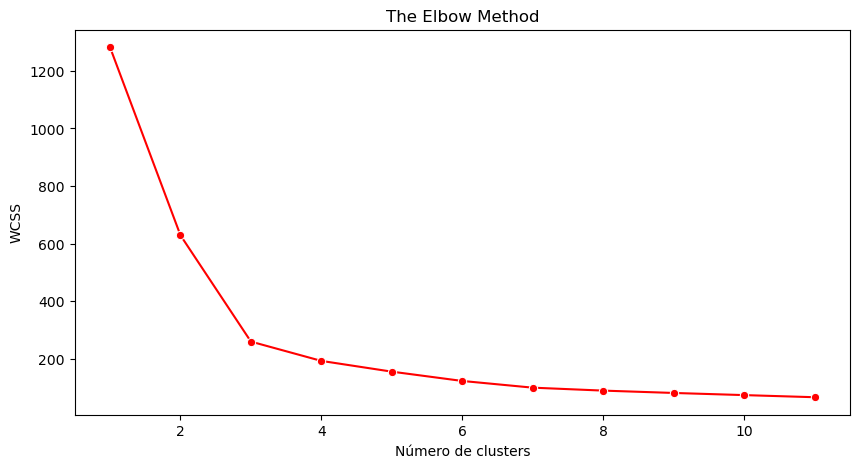

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 12), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Ponto de inflexão mais evidente ocorre em k = 3, indicando que 3 clusters é uma escolha adequada.

In [75]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 7, max_iter = 200)
kmeans_fit2 = kmeans.fit(data2_pca)

In [77]:
centroides2 = kmeans_fit2.cluster_centers_
centroides2

array([[ 2.26614991, -0.86559213],
       [-2.74392982, -1.2141906 ],
       [-0.16278513,  1.76758824]])

In [79]:
classificacao2 = kmeans_fit2.labels_
classificacao2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [80]:
import plotly.express as px
import plotly.graph_objects as go

In [81]:
graf1 = px.scatter(x = data2_pca[:,0], y = data2_pca[:,1], color=classificacao2)
graf2 = px.scatter(x = centroides2[:,0], y = centroides2[:,1], size = [15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [85]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Group'])
data4 = pd.concat([data2, agrupamento2],axis=1)
data4

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [96]:
grupo0 = data4.loc[data4.Group == 0]
grupo0.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0


In [93]:
grupo1 = data4.loc[data4.Group == 1]
grupo1.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.8,0.84,2.01,515,1
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630,1


In [95]:
grupo2 = data4.loc[data4.Group ==2]
grupo2.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2


## ALGORITMO HIERÁRQUICO COM PCA

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components = 2)

In [99]:
data2_pca = pca.fit_transform(data2_esc)

In [100]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

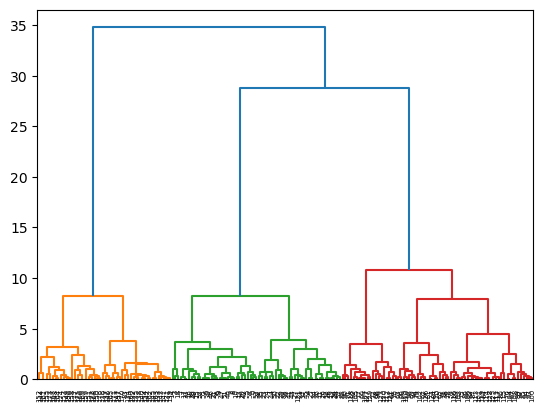

In [114]:
dendrograma = dendrogram(linkage(data2_pca, method = 'ward'))

In [115]:
from sklearn.cluster import AgglomerativeClustering

In [116]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
classificacao3 = hier.fit_predict(data2_pca)

In [118]:
import plotly.express as px

In [121]:
graf = px.scatter(x = data2_pca[:,0], y = data2_pca[:,1], color=classificacao3)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

In [122]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Group'])
data5 = pd.concat([data2, agrupamento3],axis=1)

In [123]:
data5

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


## ALGORITMO DBSCAN COM TODOS OS ATRIBUTOS

In [157]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [160]:
pca = PCA(n_components = 2)

In [213]:
data2_pca = pca.fit_transform(data2_esc)

In [249]:
dbscan = DBSCAN(eps = 0.81, min_samples=14)
dbscan.fit(data2_pca)

DBSCAN(eps=0.81, min_samples=14)

In [248]:
dbscan_classificacao = dbscan.labels_
dbscan_classificacao

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,
       -1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  1, -1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [250]:
import plotly.express as px

In [251]:
graf = px.scatter(x = data2_pca[:,0], y = data2_pca[:,1], color=dbscan_classificacao)
graf.update_layout(width=800,height=500,title_text='Agrupamento DBSCAN')
graf.show()

In [253]:
agrupamento5= pd.DataFrame(dbscan_classificacao, columns = ['Group'])
agrupamento5

,Group
0,0
1,0
2,0
3,-1
4,0
...,...
173,2
174,2
175,2
176,2


In [254]:
data_dbscan = pd.concat([data2, agrupamento5],axis=1)
data_dbscan

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [255]:
ruido = data_dbscan.loc[data_dbscan.Group == -1]
ruido

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,-1
18,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680,-1
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,-1
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278,-1
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,-1
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,-1
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,-1
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,-1
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,-1
